<a href="https://colab.research.google.com/github/yingqi-hub/GEOG5990M-Final-Assignment/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GEOG5990M Final Assignment**

Student ID number:201981839

## Introduction

Commuting distance is an important indicator of travel behaviour, urban form, and sustainability. Longer commuting distances are often associated with increased carbon emissions, transport inequality, and reduced quality of life.

Leeds is a major UK city with diverse residential and employment patterns, making it a suitable case study for examining spatial variation in commuting behaviour.

This project investigates the spatial distribution of commuting distances across Lower Layer Super Output Areas (LSOAs) in Leeds using openly available census data.

Understanding these spatial patterns can support public policy decisions related to transport planning, sustainable development, and the equitable provision of services.

##Research Question

How does average commuting distance vary spatially across Leeds LSOAs?

##Data

* Spatial Boundary Data

https://geoportal.statistics.gov.uk/datasets/2bbaef5230694f3abae4f9145a3a9800_0/explore?location=52.837550%2C-2.489483%2C7

Spatial boundary data for Leeds were obtained from the Office for National Statistics (ONS) Geoportal. Lower Layer Super Output Areas (LSOAs) for 2021 were selected as they provide a consistent small-area geography suitable for spatial analysis while maintaining data privacy.

* Commuting Distance Data


Commuting distance data were sourced from the 2021 UK Census via the Nomis platform. The dataset “Distance travelled to work” was used, and the variable representing average distance to work (in kilometres) was selected at the LSOA level.

##Data Wrangling

Because geographic identifiers are needed to associate census data with spatial boundaries—a fundamental requirement of spatial analysis (Longley et al., 2015)—rows lacking LSOA codes have been removed. Furthermore, rows without valid commuting distances and the "2021 super output area - lower layer" column have also been excluded (UK Office for National Statistics, 2021).

In [63]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
from google.colab import drive
drive.mount('/content/drive')

import geopandas as gpd


lsoa = gpd.read_file('/content/Lower_layer_Super_Output_Areas_December_2021_Boundaries_EW_BFC_V10_-672099234420024429.gpkg')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
leeds_lsoa = lsoa[lsoa['LSOA21CD'].str.startswith('E0101')]


In [66]:
leeds_small = leeds_lsoa[['LSOA21CD', 'LSOA21NM', 'geometry']]


In [67]:
leeds_small['geometry'] = leeds_small['geometry'].simplify(
    tolerance=50,
    preserve_topology=True
)


/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [68]:
leeds_small.to_file('/content/drive/MyDrive/GEOG5415_data/LSOA_Leeds_final.geojson',
                    driver='GeoJSON')


In [69]:
leeds_lsoa.head()

,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
9484,E01010000,Sandwell 030A,,399482,286949,52.480480,-2.00905,{740155AD-4D7C-4F86-9766-54AB1368129E},"MULTIPOLYGON (((399844.748 287397.705, 399840...."
9485,E01010001,Sandwell 037A,,399005,286691,52.478161,-2.01607,{9A49B5EC-421A-433F-9C95-666C53233102},"MULTIPOLYGON (((399112 287077, 399103 287080, ..."
9486,E01010002,Sandwell 030B,,398863,287747,52.487652,-2.01817,{92953FE6-F2DF-4C8C-A4F9-16DC3293F7E9},"MULTIPOLYGON (((398804.219 288122.136, 398769...."
9487,E01010003,Sandwell 030C,,399212,288076,52.490608,-2.01303,{C305650D-9BC1-4A34-84F1-218DDEE3B486},"MULTIPOLYGON (((399163.094 288406.812, 399156...."
9488,E01010004,Sandwell 027D,,398496,287998,52.489910,-2.02357,{5983243F-6A61-4426-BEE5-8B8CB231BFB4},"MULTIPOLYGON (((398597.417 287304.882, 398554...."


In [70]:
leeds_lsoa.crs


<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

The LSOA boundary data are provided in the British National Grid coordinate reference system (EPSG:27700), which is appropriate for spatial analysis within the UK.

In [71]:
commute = pd.read_csv("/content/leeds_commuting_distance.csv")
commute.head()

,2021 super output area - lower layer,mnemonic,Total: All usual residents aged 16 years and over in employment the week before the census,Less than 2km,2km to less than 5km,5km to less than 10km,10km to less than 20km,20km to less than 30km,30km to less than 40km,40km to less than 60km,60km and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Leeds 001A,E01011698,696.0,104.0,28.0,43.0,109.0,61.0,10.0,8.0,8.0
2,Leeds 001B,E01011699,599.0,69.0,14.0,52.0,93.0,44.0,12.0,4.0,6.0
3,Leeds 001C,E01011701,622.0,77.0,21.0,37.0,116.0,46.0,9.0,9.0,7.0
4,Leeds 001D,E01011702,717.0,43.0,14.0,37.0,118.0,62.0,6.0,11.0,14.0


In [72]:
commute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 11 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   2021 super output area - lower layer                                                        488 non-null    object 
 1   mnemonic                                                                                    502 non-null    object 
 2   Total: All usual residents aged 16 years and over in employment the week before the census  488 non-null    float64
 3   Less than 2km                                                                               488 non-null    float64
 4   2km to less than 5km                                                                        488 non-null    float64
 5   5km to less than 10km                      

Commuting dataset contains 509 rows and 11 columns,but it still has some missing data.We need to clean them to make data exactly.

In [73]:
commute.isnull().sum()


,0
2021 super output area - lower layer,21
mnemonic,7
Total: All usual residents aged 16 years and over in employment the week before the census,21
Less than 2km,21
2km to less than 5km,21
5km to less than 10km,21
10km to less than 20km,21
20km to less than 30km,21
30km to less than 40km,21
40km to less than 60km,21


In [74]:
commute = commute.drop(columns =['2021 super output area - lower layer'])


In [75]:
commute.dropna()

,mnemonic,Total: All usual residents aged 16 years and over in employment the week before the census,Less than 2km,2km to less than 5km,5km to less than 10km,10km to less than 20km,20km to less than 30km,30km to less than 40km,40km to less than 60km,60km and over
1,E01011698,696.0,104.0,28.0,43.0,109.0,61.0,10.0,8.0,8.0
2,E01011699,599.0,69.0,14.0,52.0,93.0,44.0,12.0,4.0,6.0
3,E01011701,622.0,77.0,21.0,37.0,116.0,46.0,9.0,9.0,7.0
4,E01011702,717.0,43.0,14.0,37.0,118.0,62.0,6.0,11.0,14.0
5,E01011703,406.0,18.0,2.0,19.0,66.0,51.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...
484,E01033016,789.0,148.0,53.0,21.0,53.0,33.0,3.0,6.0,14.0
485,E01011467,938.0,127.0,188.0,71.0,63.0,16.0,18.0,6.0,12.0
486,E01011468,933.0,123.0,205.0,80.0,49.0,26.0,7.0,6.0,13.0
487,E01011470,605.0,102.0,149.0,70.0,40.0,6.0,6.0,4.0,3.0


#### Visualisation aiding cleaning

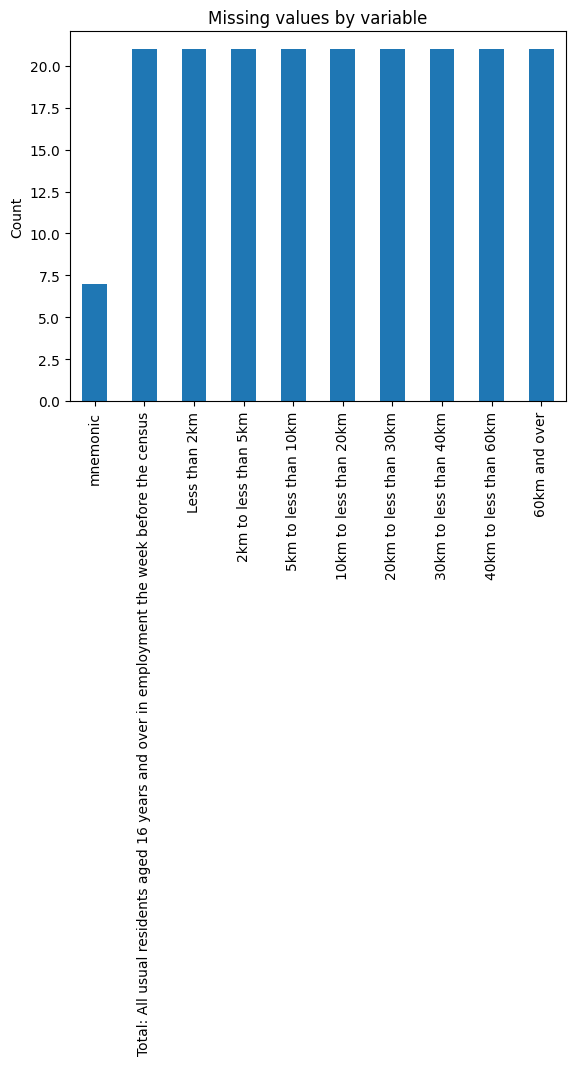

In [76]:
commute.isna().sum().plot(kind="bar")
plt.title("Missing values by variable")
plt.ylabel("Count")
plt.show()


## Feature Engineering

Commuting distances are provided as grouped rather than continuous variables. To estimate the average commuting distance for each Lower Statistical Area (LSOA), we calculated a weighted average using the representative midpoint value of each distance interval. While this approach does not reveal differences within intervals, it allows for meaningful comparisons between different areas and supports spatial visualization and modeling. The final variable is the average commuting distance in kilometers.


In [77]:
distance_midpoints = {
    "Less than 2km": 1,
    "2km to less than 5km": 3.5,
    "5km to less than 10km": 7.5,
    "10km to less than 20km": 15,
    "20km to less than 30km": 25,
    "30km to less than 40km": 35,
    "40km to less than 60km": 50,
    "60km and over": 70
}


In [78]:
distance_cols = list(distance_midpoints.keys())

commute[distance_cols] = commute[distance_cols].apply(
    pd.to_numeric,
    errors="coerce"
)


In [79]:
weighted_sum = sum(
    commute[col] * midpoint
    for col, midpoint in distance_midpoints.items()
)

commute["avg_commute_km"] = (
    weighted_sum /
    commute["Total: All usual residents aged 16 years and over in employment the week before the census"]
)


In [80]:
commute["avg_commute_km"].describe()


,avg_commute_km
count,488.000000
mean,5.252737
std,1.101457
min,2.968829
25%,4.532212
50%,5.080873
75%,5.730319
max,9.675063


In [81]:
commute = commute.rename(columns={"mnemonic": "LSOA21CD"})

In [82]:
gdf = LSOA.merge(
    commute[["LSOA21CD", "avg_commute_km"]],
    on="LSOA21CD",
    how="left"
)


In [83]:
gdf["avg_commute_km"].describe()


,avg_commute_km
count,488.000000
mean,5.252737
std,1.101457
min,2.968829
25%,4.532212
50%,5.080873
75%,5.730319
max,9.675063


##Statistical Modelling

The OLS regression identifies a statistically significant positive association between latitude and average commuting distance (β = 3.50, p = 0.002), suggesting that LSOAs located further north tend to have longer average commutes. The overall model is significant (F = 9.46, p < 0.01), indicating that latitude provides some explanatory power.

However, the R-squared value is low (R² = 0.019), showing that latitude explains only a small proportion of the variation in commuting distance. This is expected given that commuting behaviour is influenced by multiple socio-economic and infrastructural factors. The model should therefore be interpreted as exploratory rather than predictive.


In [84]:
import statsmodels.api as sm

gdf = LSOA.merge(
    commute[["LSOA21CD", "avg_commute_km"]],
    on="LSOA21CD",
    how="left"
)

X = sm.add_constant(gdf["LAT"])
y = gdf["avg_commute_km"]

model = sm.OLS(y, X, missing="drop").fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_commute_km   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.462
Date:                Fri, 30 Jan 2026   Prob (F-statistic):            0.00222
Time:                        01:06:04   Log-Likelihood:                -734.39
No. Observations:                 488   AIC:                             1473.
Df Residuals:                     486   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -182.8783     61.161     -2.990      0.003    -303.050     -62.707
LAT            3.4962      1.137      3.076      0.002       1.263       5.729
==============================================================================
Omnibus:                       75.793   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.518
Skew:                           0.973   Prob(JB):                     6.76e-27
Kurtosis:                       4.463   Cond. No.                     6.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Data Visualisation

###Non-spatial visualisation

The histogram shows that most LSOAs in Leeds have an average commuting distance between approximately 4 and 6 km, with a right-skewed distribution indicating a smaller number of areas with substantially longer commutes. This type of visualisation is easy to understand for non-specialist audiences and is effective for identifying typical values and skewness in the data (Few, 2012). A simple colour scheme and clear axis labels were used to ensure readability and accessibility, including for colour-blind users (Brewer, 1999).

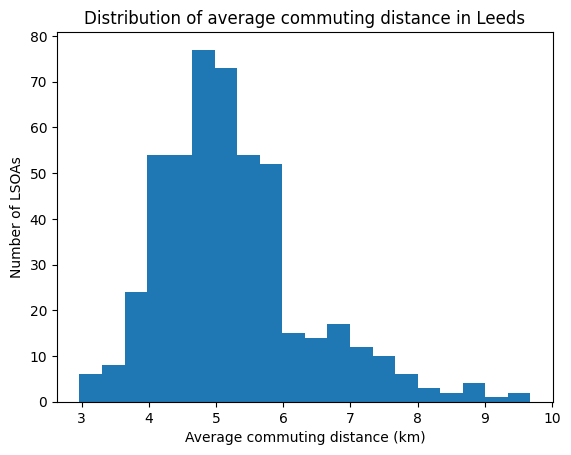

In [85]:
plt.figure()
plt.hist(gdf["avg_commute_km"].dropna(), bins=20)
plt.xlabel("Average commuting distance (km)")
plt.ylabel("Number of LSOAs")
plt.title("Distribution of average commuting distance in Leeds")
plt.show()


###Spatial Visualisation

The choropleth map was selected to visualise spatial variation in commuting distance. Choropleth maps are widely used to communicate geographic patterns in aggregated socio-economic data (Slocum et al., 2009).The map shows clear differences in average commuting distance across Leeds. Areas close to the city centre generally have shorter average commuting distances, while areas further from the centre tend to have longer commutes. This suggests that people living in outer parts of Leeds often need to travel further to work.

A sequential colour scheme was used so that higher values of commuting distance are shown with darker colours. （Brewer，1999）This makes the map easy to understand for the general public.


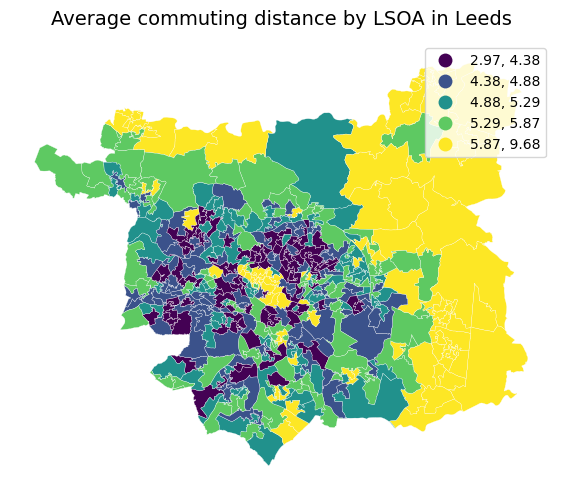

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(7, 9))

gdf.plot(
    column="avg_commute_km",
    ax=ax,
    legend=True,
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.2
)

ax.set_title(
    "Average commuting distance by LSOA in Leeds",
    fontsize=14,
    pad=12
)

ax.axis("off")

plt.show()


##Discussion & Limitations

The results show clear spatial differences in average commuting distance across Leeds. LSOAs closer to the city centre generally have shorter commuting distances, while areas further away tend to have longer commutes. This pattern is likely linked to the concentration of jobs and services in central areas and has implications for transport planning and sustainability.

However, this analysis has several limitations. Commuting distance was estimated using grouped census data and midpoint values, which provides only an approximation of actual commuting behaviour. In addition, the analysis uses aggregated LSOA-level data and does not capture individual commuting choices. Other factors such as income, transport mode, and job type were not included and may also influence commuting distance.


##Conclusion

This project used open census and spatial data to explore average commuting distance across Leeds. The results show clear spatial patterns, with shorter commutes in central areas and longer commutes in outer LSOAs. These findings highlight spatial differences in access to employment and may be useful for transport planning and policy aimed at reducing travel distance and improving sustainability.


##Reproducibility Statement

All data and code used in this analysis are provided in the accompanying GitHub repository. The Jupyter notebook can be run from start to finish to reproduce all data processing steps, analyses, and visualisations presented in this project.


##References

Brewer, C.A. (1999) ‘Color use guidelines for mapping and visualization’, in Visualization in modern cartography. Oxford: Pergamon, pp. 123–147.

Few, S. (2012) Show me the numbers: Designing tables and graphs to enlighten. 2nd edn. Burlingame, CA: Analytics Press.

Longley, P.A., Goodchild, M.F., Maguire, D.J. and Rhind, D.W. (2015) Geographic information science and systems. 4th edn. Hoboken, NJ: Wiley.

Office for National Statistics (2021) Census 2021: commuting to work. Available at: https://www.ons.gov.uk
 (Accessed: 29 January 2026).

Slocum, T.A., McMaster, R.B., Kessler, F.C. and Howard, H.H. (2009) Thematic cartography and geovisualization. 3rd edn. Upper Saddle River, NJ: Pearson Prentice Hall.